In [ ]:
import keras
#from keras.datasets import mnist #import Data
from sklearn.model_selection import train_test_split
from keras.models import Sequential #preparing layres position
from keras.layers import Dense, Dropout, Flatten, Activation  #3 layers
from keras.layers import Conv2D,MaxPooling2D,GRU,Conv1D,MaxPooling1D #convolution & pooling
from tensorflow.keras import utils as np_utils
import numpy as np
np.set_printoptions(threshold=1000,suppress=True)
import pandas as pd
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt #graph 2D
import warnings
warnings.filterwarnings('ignore')

In [ ]:
epilepsie_data=pd.read_csv('data.csv',sep=',',header=0)
epilepsie_data.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,...,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,-38,-10,35,64,113,152,164,127,50,-47,-121,-138,-125,-101,-50,11,39,24,48,64,46,13,-19,-61,-96,-130,-132,-116,-115,-71,...,54,90,111,107,64,32,18,-25,-69,-65,-44,-33,-57,-88,-114,-130,-114,-83,-53,-79,-72,-85,-109,-98,-72,-65,-63,-11,10,8,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,232,237,258,212,2,-267,-605,-850,-1001,-1109,-1090,-967,-746,-464,-152,118,318,427,473,485,447,397,339,312,314,326,335,332,324,310,...,27,146,229,269,297,307,303,305,306,307,280,231,159,85,51,43,62,63,63,69,89,123,136,127,102,95,105,131,163,168,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,-99,-94,-96,-104,-103,-92,-75,-69,-69,-53,-37,-14,-10,-39,-78,-102,-98,-80,-54,-40,-35,-39,-32,-13,7,34,41,33,6,...,-82,-107,-126,-124,-108,-84,-68,-61,-56,-63,-62,-33,1,28,45,37,48,62,80,66,23,-11,-39,-44,-42,-45,-48,-42,-6,29,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,-72,-68,-74,-80,-83,-73,-68,-61,-58,-59,-64,-79,-84,-97,-94,-84,-77,-75,-72,-68,-76,-76,-72,-67,-69,-69,-69,-67,-68,...,-69,-66,-74,-69,-61,-51,-45,-45,-49,-58,-64,-78,-80,-90,-87,-83,-78,-64,-38,-22,-29,-42,-51,-68,-71,-69,-69,-74,-74,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,-90,-103,-84,-43,-9,3,-21,-60,-96,-103,-75,-29,14,55,78,73,28,-13,-43,-68,-78,-75,-55,-41,-19,-20,-29,-36,-20,...,38,26,10,-4,-13,-8,0,10,19,29,57,63,45,7,-13,-23,-9,9,11,3,-1,-2,4,18,27,27,14,15,11,10,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [ ]:
epilepsie_data.shape

(11500, 180)

In [ ]:
epilepsie_data=epilepsie_data.drop(['Unnamed: 0'],axis=1)

In [ ]:
epilepsie_data.shape

(11500, 179)

In [ ]:
X=epilepsie_data.iloc[:,0:178]
Y=epilepsie_data['y']
X=X.values
Y=Y.values

In [ ]:
Y

array([4, 1, 5, ..., 5, 3, 4])

In [ ]:
Y[Y[:] == 1]=1
Y[Y[:] > 1]=0

In [ ]:
Y

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
epilepsie_data['y'].value_counts()

0    9200
1    2300
Name: y, dtype: int64

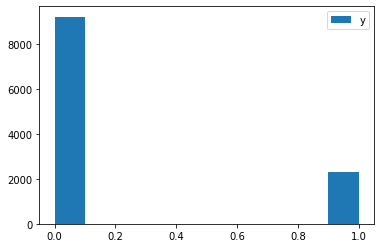

In [ ]:
plt.hist(epilepsie_data['y'],label='y')
plt.legend()

In [ ]:
X

array([[ 135,  190,  229, ..., -116,  -83,  -51],
       [ 386,  382,  356, ...,  154,  143,  129],
       [ -32,  -39,  -47, ...,  -35,  -35,  -36],
       ...,
       [  14,    6,  -13, ...,   -2,   -1,   -8],
       [ -40,  -25,   -9, ...,   68,   59,   55],
       [  29,   41,   57, ...,   -2,    2,   20]])

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

In [ ]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size=0.1,random_state=1)

In [ ]:
Xtrain=Xtrain.reshape(Xtrain.shape[0],Xtrain.shape[1],1).astype('float32')
Xtest=Xtest.reshape(Xtest.shape[0],Xtrain.shape[1],1).astype('float32')
input_shape=(Xtrain.shape[1],1)

In [ ]:
Xtrain /=255.0
Xtest /=255.0

In [ ]:
Xtrain.shape

(10350, 178, 1)

In [ ]:
Ytrain.shape

(10350,)

In [ ]:
Ytrain_one_hot = np_utils.to_categorical(Ytrain,2)
Ytest_one_hot = np_utils.to_categorical(Ytest,2)

In [ ]:
model = Sequential()
model.add(Conv1D(64,kernel_size=3,activation='relu',strides=1,input_shape=(Xtrain.shape[1],Xtrain.shape[2])))
model.add(MaxPooling1D(pool_size=2,strides=2))

model.add(Conv1D(128,kernel_size=3,activation='relu'))
model.add(Conv1D(512,kernel_size=3,activation='relu'))
model.add(Conv1D(1024,kernel_size=3,activation='relu'))

model.add(Flatten())
x = model.output
x=Dense(256,activation='relu')(x)
x=Dropout(0.3)(x)
x=Dense(256,activation='relu')(x)
#x=Dropout(0.3)(x)
x=Dense(128,activation='relu')(x)
#x=Dropout(0.2)(x)
x=Dense(64,activation='relu')(x)

prediction_layer = Dense(2, activation = 'softmax')(x)
#model.add(Dense(6,activation='softmax'))

In [ ]:
from keras.models import Model

In [ ]:
cnn_model = Model(inputs=model.input,outputs=prediction_layer)

In [ ]:
cnn_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_input (InputLayer)    [(None, 178, 1)]          0         
_________________________________________________________________
conv1d (Conv1D)              (None, 176, 64)           256       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 88, 64)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 86, 128)           24704     
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 84, 512)           197120    
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 82, 1024)          1573888   
_________________________________________________________________
flatten (Flatten)            (None, 83968)             0     

In [ ]:
cnn_model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [ ]:
batch_size = 1350 #elements contains
epochs = 50

In [ ]:
history = cnn_model.fit(Xtrain,Ytrain_one_hot,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(Xtest,Ytest_one_hot))

Epoch 1/50
8/8 [==============================] - 52s 732ms/step - loss: 0.7181 - accuracy: 0.4986 - val_loss: 0.5500 - val_accuracy: 0.9470
Epoch 2/50
8/8 [==============================] - 3s 344ms/step - loss: 0.4071 - accuracy: 0.9456 - val_loss: 0.2197 - val_accuracy: 0.9426
Epoch 3/50
8/8 [==============================] - 3s 346ms/step - loss: 0.1855 - accuracy: 0.9458 - val_loss: 0.1349 - val_accuracy: 0.9461
Epoch 4/50
8/8 [==============================] - 3s 346ms/step - loss: 0.1371 - accuracy: 0.9468 - val_loss: 0.1355 - val_accuracy: 0.9522
Epoch 5/50
8/8 [==============================] - 3s 347ms/step - loss: 0.1103 - accuracy: 0.9554 - val_loss: 0.1081 - val_accuracy: 0.9574
Epoch 6/50
8/8 [==============================] - 3s 347ms/step - loss: 0.0954 - accuracy: 0.9589 - val_loss: 0.1048 - val_accuracy: 0.9574
Epoch 7/50
8/8 [==============================] - 3s 349ms/step - loss: 0.0909 - accuracy: 0.9619 - val_loss: 0.0983 - val_accuracy: 0.9635
Epoch 8/50
8/8 [===

In [ ]:
score = cnn_model.evaluate(Xtrain,Ytrain_one_hot,verbose=0)
print('test loss = ',score[0])
print('accuracy = ',score[1])

test loss =  0.000853407138492912
accuracy =  0.9995169043540955


In [ ]:
score = cnn_model.evaluate(Xtest,Ytest_one_hot,verbose=0)
print('test loss = ',score[0])
print('accuracy = ',score[1])

test loss =  0.1357099562883377
accuracy =  0.9843478202819824


{'loss': [0.691640317440033, 0.32940301299095154, 0.17014895379543304, 0.12798435986042023, 0.10509175807237625, 0.09688767790794373, 0.0911858007311821, 0.08573228865861893, 0.07815767824649811, 0.07299572974443436, 0.06635171920061111, 0.06284799426794052, 0.05668860301375389, 0.049790676683187485, 0.04984211176633835, 0.04389728233218193, 0.03954509645700455, 0.037357017397880554, 0.031383853405714035, 0.027621664106845856, 0.02381296269595623, 0.022030865773558617, 0.02022779919207096, 0.016950784251093864, 0.013597587123513222, 0.010586028918623924, 0.011326300911605358, 0.009955575689673424, 0.00838011596351862, 0.03559940680861473, 0.05182623118162155, 0.03023441880941391, 0.02159273624420166, 0.013506453484296799, 0.00951408501714468, 0.006634510587900877, 0.00610667048022151, 0.005711750593036413, 0.004924214910715818, 0.003735084319487214, 0.0034652934409677982, 0.003344068769365549, 0.002726383740082383, 0.002162256045266986, 0.0014656184939667583, 0.0022239009849727154, 0.0

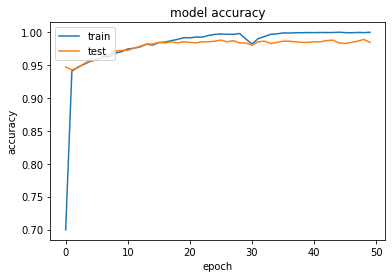

In [ ]:
print(history.history)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

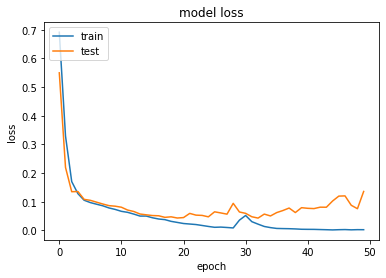

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [ ]:
y_pred = cnn_model.predict(Xtest)
y_pred = np.argmax(y_pred,axis=-1)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
cm = confusion_matrix(Ytest, y_pred)

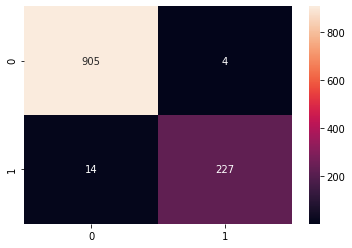

In [ ]:
sns.heatmap(cm,annot=True,fmt='g')

Text(0, 0.5, 'Fraction of incorrect predictions')

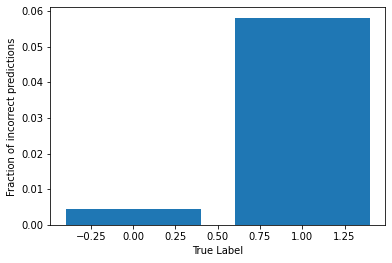

In [ ]:
incorr_fraction = 1 - np.diag(cm) / np.sum(cm, axis=1)
plt.bar(np.arange(2), incorr_fraction)
plt.xlabel('True Label')
plt.ylabel('Fraction of incorrect predictions')

In [ ]:
cp = classification_report(Ytest,y_pred)
print(cp)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       909
           1       0.98      0.94      0.96       241

    accuracy                           0.98      1150
   macro avg       0.98      0.97      0.98      1150
weighted avg       0.98      0.98      0.98      1150



#CNN_LSTM Model

In [ ]:
from keras.layers import LSTM

In [ ]:
model_LSTM = Sequential()
model_LSTM.add(Conv1D(64,kernel_size=3,activation='relu',strides=1,input_shape=(Xtrain.shape[1],Xtrain.shape[2])))
model_LSTM.add(MaxPooling1D(pool_size=2,strides=2))

model_LSTM.add(Conv1D(128,kernel_size=3,activation='relu'))
model_LSTM.add(Conv1D(512,kernel_size=3,activation='relu'))
model_LSTM.add(Conv1D(1024,kernel_size=3,activation='relu'))

#model.add(Flatten())
model_LSTM.add(Dense(256,activation='relu'))
model_LSTM.add(Dropout(0.2))
model_LSTM.add(LSTM(64,activation='tanh',return_sequences=True))
model_LSTM.add(LSTM(64,activation='tanh'))
model_LSTM.add(Dense(256,activation='relu'))
model_LSTM.add(Dense(128,activation='relu'))
model_LSTM.add(Dense(64,activation='relu'))
model_LSTM.add(Dense(2, activation = 'softmax'))


In [ ]:
model_LSTM = Sequential()
model_LSTM.add(Conv1D(64,kernel_size=3,activation='relu',strides=1,input_shape=(Xtrain.shape[1],Xtrain.shape[2])))
model_LSTM.add(MaxPooling1D(pool_size=2,strides=2))

model_LSTM.add(Conv1D(128,kernel_size=3,activation='relu'))
model_LSTM.add(Conv1D(512,kernel_size=3,activation='relu'))
model_LSTM.add(Conv1D(1024,kernel_size=3,activation='relu'))
x = model_LSTM.output
#model.add(Flatten())
x = Dense(256,activation='relu')(x)
x = Dropout(0.2)(x)
x = LSTM(64,activation='tanh',return_sequences=True)(x)
x = LSTM(64,activation='tanh')(x)
x = Dense(256,activation='relu')(x)
x = Dense(128,activation='relu')(x)
x =Dense(64,activation='relu')(x)
prediction_layer =  Dense(2, activation = 'softmax')(x)

In [ ]:
#model_CNN_LSTM = Model(inputs=model_LSTM.input,outputs=prediction_layer)

In [ ]:
model_LSTM.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_20 (Conv1D)           (None, 176, 64)           256       
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 88, 64)            0         
_________________________________________________________________
conv1d_21 (Conv1D)           (None, 86, 128)           24704     
_________________________________________________________________
conv1d_22 (Conv1D)           (None, 84, 512)           197120    
_________________________________________________________________
conv1d_23 (Conv1D)           (None, 82, 1024)          1573888   
_________________________________________________________________
dense_25 (Dense)             (None, 82, 256)           262400    
_________________________________________________________________
dropout_5 (Dropout)          (None, 82, 256)          

In [ ]:
model_LSTM.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [ ]:
batch_size = 1350
epochs = 50

In [ ]:
history_LSTM = model_LSTM.fit(Xtrain,Ytrain_one_hot,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(Xtest,Ytest_one_hot))

Epoch 1/50
8/8 [==============================] - 8s 574ms/step - loss: 0.6454 - accuracy: 0.8212 - val_loss: 0.2968 - val_accuracy: 0.9043
Epoch 2/50
8/8 [==============================] - 4s 441ms/step - loss: 0.2259 - accuracy: 0.9264 - val_loss: 0.1707 - val_accuracy: 0.9443
Epoch 3/50
8/8 [==============================] - 4s 442ms/step - loss: 0.1578 - accuracy: 0.9403 - val_loss: 0.1594 - val_accuracy: 0.9374
Epoch 4/50
8/8 [==============================] - 4s 444ms/step - loss: 0.1389 - accuracy: 0.9472 - val_loss: 0.1571 - val_accuracy: 0.9391
Epoch 5/50
8/8 [==============================] - 4s 445ms/step - loss: 0.1260 - accuracy: 0.9477 - val_loss: 0.1255 - val_accuracy: 0.9522
Epoch 6/50
8/8 [==============================] - 4s 450ms/step - loss: 0.1048 - accuracy: 0.9559 - val_loss: 0.1169 - val_accuracy: 0.9530
Epoch 7/50
8/8 [==============================] - 4s 454ms/step - loss: 0.1039 - accuracy: 0.9554 - val_loss: 0.1076 - val_accuracy: 0.9557
Epoch 8/50
8/8 [====

In [ ]:
score = model_LSTM.evaluate(Xtrain,Ytrain_one_hot,verbose=0)
print('test loss = ',score[0])
print('accuracy = ',score[1])

test loss =  0.019920876249670982
accuracy =  0.9928502440452576


In [ ]:
score = model_LSTM.evaluate(Xtest,Ytest_one_hot,verbose=0)
print('test loss = ',score[0])
print('accuracy = ',score[1])

test loss =  0.04615790396928787
accuracy =  0.9869565367698669


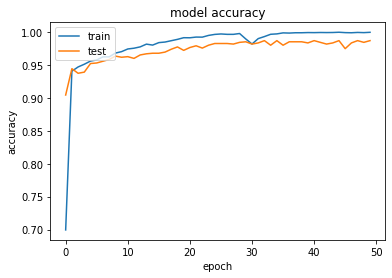

In [ ]:
#print(history_LSTM.history)
plt.plot(history.history['accuracy'])
plt.plot(history_LSTM.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

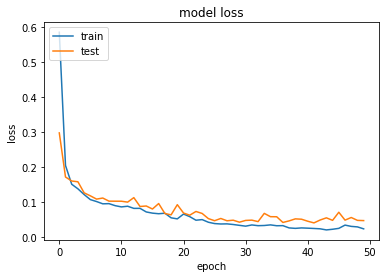

In [ ]:
plt.plot(history_LSTM.history['loss'])
plt.plot(history_LSTM.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [ ]:
y_pred = model_LSTM.predict(Xtest)
y_pred = np.argmax(y_pred,axis=-1)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
cm = confusion_matrix(Ytest, y_pred)

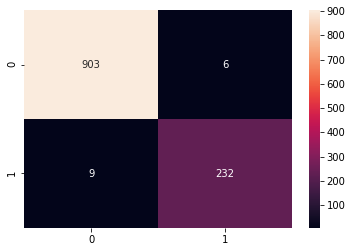

In [ ]:
sns.heatmap(cm, annot=True,fmt='g')

Text(0, 0.5, 'Fraction of incorrect predictions')

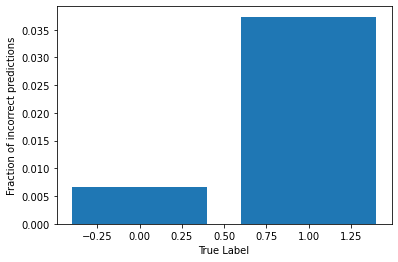

In [ ]:
incorr_fraction = 1 - np.diag(cm) / np.sum(cm, axis=1)
plt.bar(np.arange(2), incorr_fraction)
plt.xlabel('True Label')
plt.ylabel('Fraction of incorrect predictions')

In [ ]:
cp = classification_report(Ytest,y_pred)
print(cp)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       909
           1       0.97      0.96      0.97       241

    accuracy                           0.99      1150
   macro avg       0.98      0.98      0.98      1150
weighted avg       0.99      0.99      0.99      1150



#CNN_Model & CNN_LSTM_Model Courbe

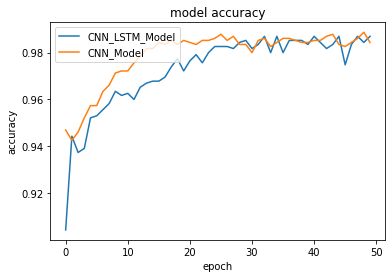

In [ ]:
#print(history_LSTM.history)
#plt.plot(history_LSTM.history['accuracy'])
plt.plot(history_LSTM.history['val_accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['CNN_LSTM_Model','CNN_Model'],loc='upper left')
plt.show()

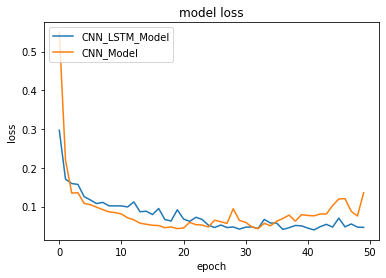

In [ ]:
plt.plot(history_LSTM.history['val_loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['CNN_LSTM_Model','CNN_Model'],loc='upper left')
plt.show()

#CNN_SVM_Model

In [ ]:
X_for_SVM = cnn_model.predict(Xtrain)

In [ ]:
from sklearn.svm import SVC

In [ ]:
SVM_model = SVC(gamma='auto',C=150,kernel='linear')

In [ ]:
SVM_model.fit(X_for_SVM,Ytrain)

SVC(C=150, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
X_test_features = cnn_model.predict(Xtest)

In [ ]:
prediction_SVM = SVM_model.predict(X_test_features)

In [ ]:
from sklearn import metrics

In [ ]:
print ("Accuracy = ", metrics.accuracy_score(Ytest, prediction_SVM))

Accuracy =  0.9826086956521739


In [ ]:
cm = confusion_matrix(Ytest, prediction_SVM)
print(cm)

[[902   7]
 [ 13 228]]


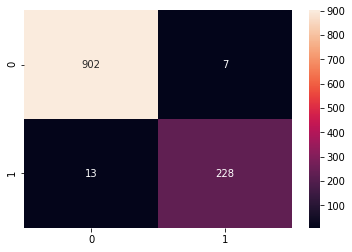

In [ ]:
sns.heatmap(cm, annot=True,fmt='g')

Text(0, 0.5, 'Fraction of incorrect predictions')

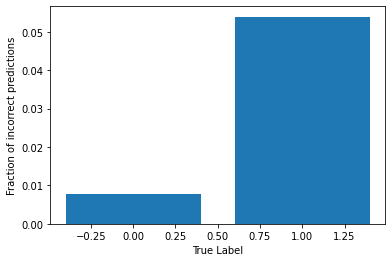

In [ ]:
incorr_fraction = 1 - np.diag(cm) / np.sum(cm, axis=1)
plt.bar(np.arange(2), incorr_fraction)
plt.xlabel('True Label')
plt.ylabel('Fraction of incorrect predictions')

In [ ]:
cp = classification_report(Ytest,y_pred)
print(cp)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       909
           1       0.98      0.95      0.97       241

    accuracy                           0.99      1150
   macro avg       0.99      0.97      0.98      1150
weighted avg       0.99      0.99      0.99      1150



#CNN_RF_Model

In [ ]:
X_For_RF = cnn_model.predict(Xtrain)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RF_model = RandomForestClassifier(n_estimators=200,criterion='entropy',random_state=42)

In [ ]:
RF_model.fit(X_For_RF,Ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
X_test_features = cnn_model.predict(Xtest)

In [ ]:
prediction_RF = RF_model.predict(X_test_features)

In [ ]:
from sklearn import metrics

In [ ]:
print ("Accuracy = ", metrics.accuracy_score(Ytest, prediction_RF))

Accuracy =  0.9826086956521739


In [ ]:
cm = confusion_matrix(Ytest, prediction_RF)

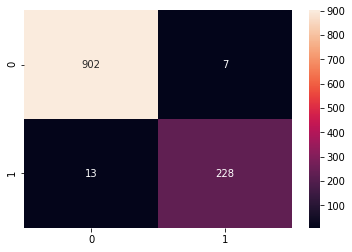

In [ ]:
sns.heatmap(cm, annot=True,fmt='g')

Text(0, 0.5, 'Fraction of incorrect predictions')

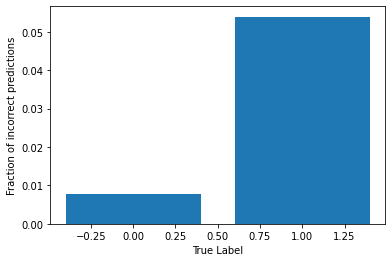

In [ ]:
incorr_fraction = 1 - np.diag(cm) / np.sum(cm, axis=1)
plt.bar(np.arange(2), incorr_fraction)
plt.xlabel('True Label')
plt.ylabel('Fraction of incorrect predictions')

In [ ]:
cp = classification_report(Ytest,y_pred)
print(cp)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       909
           1       0.98      0.95      0.97       241

    accuracy                           0.99      1150
   macro avg       0.99      0.97      0.98      1150
weighted avg       0.99      0.99      0.99      1150



#Histogramme

accuracy-training & accuracy val

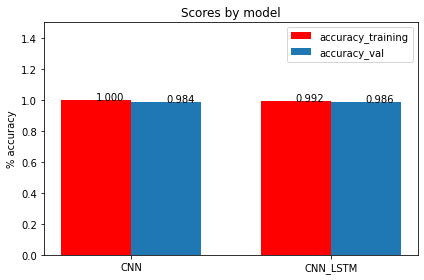

In [ ]:
labels = ['CNN', 'CNN_LSTM']
accuracy_training = [1.0,0.992]
accuracy_val = [0.984, 0.986]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, accuracy_training, width, label='accuracy_training',color='red')
rects2 = ax.bar(x + width/2, accuracy_val, width, label='accuracy_val')

ax=plt.gca()
for p in ax.patches:
  ax.text(p.get_x()+p.get_width()/2,p.get_height(),'%.3f' % float(p.get_height()))

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('% accuracy')
ax.set_title('Scores by model')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.ylim(0, 1.5) 
#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

accuracy 4 modéle

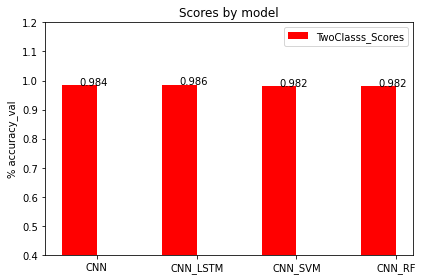

In [ ]:
labels = ['CNN', 'CNN_LSTM', 'CNN_SVM', 'CNN_RF']
twoClasss_Scores = [0.984, 0.986,0.982,0.982]
#women_means = [25, 32, 34, 20, 25]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, twoClasss_Scores, width, label='TwoClasss_Scores',color='red')
#rects2 = ax.bar(x + width/2, women_means, width, label='Women')

ax=plt.gca()
for p in ax.patches:
  ax.text(p.get_x()+p.get_width()/2,p.get_height(),'%.3f' % float(p.get_height()))

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('% accuracy_val')
ax.set_title('Scores by model')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.ylim(0.4, 1.2)

#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

accuracy model 5 classe et model binaire

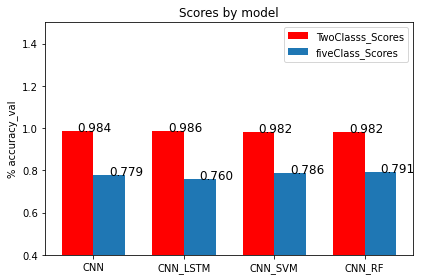

In [ ]:
labels = ['CNN', 'CNN_LSTM', 'CNN_SVM', 'CNN_RF']
twoClasss_Scores = [0.984, 0.986,0.982,0.982]
fiveClass_Scores = [0.779, 0.760, 0.786, 0.791]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, twoClasss_Scores, width, label='TwoClasss_Scores',color='red')
rects2 = ax.bar(x + width/2, fiveClass_Scores, width, label='fiveClass_Scores')

ax=plt.gca()
for p in ax.patches:
  ax.text(p.get_x()+p.get_width()/2,p.get_height(),'%.3f' % float(p.get_height()),fontsize=12)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('% accuracy_val')
ax.set_title('Scores by model')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.ylim(0.4, 1.5) 
#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

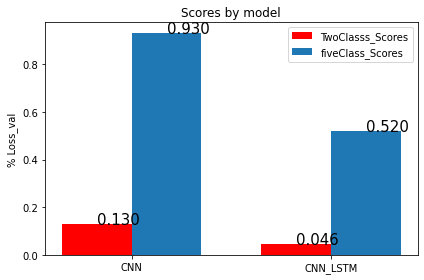

In [ ]:
labels = ['CNN', 'CNN_LSTM']
twoClasss_Scores = [0.13,0.046]
fiveClass_Scores = [0.93, 0.52]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, twoClasss_Scores, width, label='TwoClasss_Scores',color='red')
rects2 = ax.bar(x + width/2, fiveClass_Scores, width, label='fiveClass_Scores')

ax=plt.gca()
for p in ax.patches:
  ax.text(p.get_x()+p.get_width()/2,p.get_height(),'%.3f' % float(p.get_height()),fontsize=15)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('% Loss_val')
ax.set_title('Scores by model')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

#plt.ylim(0, 1.5) 
#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

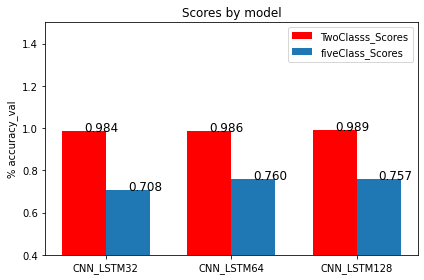

In [ ]:
labels = ['CNN_LSTM32', 'CNN_LSTM64', 'CNN_LSTM128']
twoClasss_Scores = [0.984, 0.986,0.989]
fiveClass_Scores = [0.708,0.760, 0.757]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, twoClasss_Scores, width, label='TwoClasss_Scores',color='red')
rects2 = ax.bar(x + width/2, fiveClass_Scores, width, label='fiveClass_Scores')

ax=plt.gca()
for p in ax.patches:
  ax.text(p.get_x()+p.get_width()/2,p.get_height(),'%.3f' % float(p.get_height()),fontsize=12)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('% accuracy_val')
ax.set_title('Scores by model')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.ylim(0.4, 1.5) 
#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

#CNN_LSTM_Differentes Nbre Neurones

32 neurones

In [ ]:
model_LSTM32 = Sequential()
model_LSTM32.add(Conv1D(64,kernel_size=3,activation='relu',strides=1,input_shape=(Xtrain.shape[1],Xtrain.shape[2])))
model_LSTM32.add(MaxPooling1D(pool_size=2,strides=2))

model_LSTM32.add(Conv1D(128,kernel_size=3,activation='relu'))
model_LSTM32.add(Conv1D(512,kernel_size=3,activation='relu'))
model_LSTM32.add(Conv1D(1024,kernel_size=3,activation='relu'))

#model.add(Flatten())
model_LSTM32.add(Dense(256,activation='relu'))
model_LSTM32.add(Dropout(0.2))
model_LSTM32.add(LSTM(32,activation='tanh',return_sequences=True))
model_LSTM32.add(LSTM(32,activation='tanh'))
model_LSTM32.add(Dense(256,activation='relu'))
model_LSTM32.add(Dense(128,activation='relu'))
model_LSTM32.add(Dense(64,activation='relu'))
model_LSTM32.add(Dense(Ytrain_one_hot.shape[1], activation = 'softmax'))


In [ ]:
model_LSTM32.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [ ]:
history_LSTM32 = model_LSTM32.fit(Xtrain,Ytrain_one_hot,batch_size = batch_size,epochs=epochs,verbose=1,validation_data=(Xtest,Ytest_one_hot))

Epoch 1/50
8/8 [==============================] - 8s 555ms/step - loss: 0.6680 - accuracy: 0.5966 - val_loss: 0.5305 - val_accuracy: 0.9435
Epoch 2/50
8/8 [==============================] - 3s 425ms/step - loss: 0.4390 - accuracy: 0.9409 - val_loss: 0.2505 - val_accuracy: 0.9096
Epoch 3/50
8/8 [==============================] - 3s 429ms/step - loss: 0.1887 - accuracy: 0.9322 - val_loss: 0.1432 - val_accuracy: 0.9496
Epoch 4/50
8/8 [==============================] - 3s 429ms/step - loss: 0.1230 - accuracy: 0.9513 - val_loss: 0.1292 - val_accuracy: 0.9417
Epoch 5/50
8/8 [==============================] - 3s 432ms/step - loss: 0.1024 - accuracy: 0.9548 - val_loss: 0.1117 - val_accuracy: 0.9513
Epoch 6/50
8/8 [==============================] - 3s 435ms/step - loss: 0.0965 - accuracy: 0.9553 - val_loss: 0.1119 - val_accuracy: 0.9617
Epoch 7/50
8/8 [==============================] - 3s 438ms/step - loss: 0.1001 - accuracy: 0.9598 - val_loss: 0.1126 - val_accuracy: 0.9478
Epoch 8/50
8/8 [====

In [ ]:
score = model_LSTM32.evaluate(Xtrain,Ytrain_one_hot,verbose=0)
print('test loss = ',score[0])
print('accuracy = ',score[1])

test loss =  0.023775093257427216
accuracy =  0.9927536249160767


In [ ]:
score = model_LSTM32.evaluate(Xtest,Ytest_one_hot,verbose=0)
print('test loss = ',score[0])
print('accuracy = ',score[1])

test loss =  0.04108666256070137
accuracy =  0.9843478202819824


128 neurones

In [ ]:
model_LSTM128 = Sequential()
model_LSTM128.add(Conv1D(64,kernel_size=3,activation='relu',strides=1,input_shape=(Xtrain.shape[1],Xtrain.shape[2])))
model_LSTM128.add(MaxPooling1D(pool_size=2,strides=2))

model_LSTM128.add(Conv1D(128,kernel_size=3,activation='relu'))
model_LSTM128.add(Conv1D(512,kernel_size=3,activation='relu'))
model_LSTM128.add(Conv1D(1024,kernel_size=3,activation='relu'))

#model.add(Flatten())
model_LSTM128.add(Dense(256,activation='relu'))
model_LSTM128.add(Dropout(0.2))
model_LSTM128.add(LSTM(32,activation='tanh',return_sequences=True))
model_LSTM128.add(LSTM(32,activation='tanh'))
model_LSTM128.add(Dense(256,activation='relu'))
model_LSTM128.add(Dense(128,activation='relu'))
model_LSTM128.add(Dense(64,activation='relu'))
model_LSTM128.add(Dense(Ytrain_one_hot.shape[1], activation = 'softmax'))


In [ ]:
model_LSTM128.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [ ]:
history_LSTM128 = model_LSTM128.fit(Xtrain,Ytrain_one_hot,batch_size = batch_size,epochs=epochs,verbose=1,validation_data=(Xtest,Ytest_one_hot))

Epoch 1/50
8/8 [==============================] - 8s 574ms/step - loss: 0.6667 - accuracy: 0.6698 - val_loss: 0.4881 - val_accuracy: 0.9087
Epoch 2/50
8/8 [==============================] - 3s 438ms/step - loss: 0.3592 - accuracy: 0.9357 - val_loss: 0.2241 - val_accuracy: 0.9313
Epoch 3/50
8/8 [==============================] - 4s 441ms/step - loss: 0.1722 - accuracy: 0.9399 - val_loss: 0.1581 - val_accuracy: 0.9374
Epoch 4/50
8/8 [==============================] - 4s 442ms/step - loss: 0.1494 - accuracy: 0.9370 - val_loss: 0.1354 - val_accuracy: 0.9496
Epoch 5/50
8/8 [==============================] - 4s 443ms/step - loss: 0.1231 - accuracy: 0.9524 - val_loss: 0.1283 - val_accuracy: 0.9443
Epoch 6/50
8/8 [==============================] - 4s 443ms/step - loss: 0.1146 - accuracy: 0.9527 - val_loss: 0.1141 - val_accuracy: 0.9539
Epoch 7/50
8/8 [==============================] - 3s 437ms/step - loss: 0.1011 - accuracy: 0.9602 - val_loss: 0.1196 - val_accuracy: 0.9487
Epoch 8/50
8/8 [====

In [ ]:
score = model_LSTM128.evaluate(Xtrain,Ytrain_one_hot,verbose=0)
print('test loss = ',score[0])
print('accuracy = ',score[1])

test loss =  0.024573281407356262
accuracy =  0.9916908144950867


In [ ]:
score = model_LSTM128.evaluate(Xtest,Ytest_one_hot,verbose=0)
print('test loss = ',score[0])
print('accuracy = ',score[1])

test loss =  0.031335171312093735
accuracy =  0.9895651936531067
